# Load the Diabetes dataset (via scikit-learn)

In [27]:
import matplotlib.pyplot as plt 
from sklearn import datasets
import seaborn as sns
import numpy as np
diabetes = datasets.load_diabetes()

In [28]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
print(diabetes.keys()) 

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [5]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [6]:
print(diabetes.data)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


Create X and Y data matrices

In [7]:
X = diabetes.data
Y = diabetes.target

X.shape, Y.shape

((442, 10), (442,))

# Data split


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
X_train.shape, Y_train.shape

((353, 10), (353,))

In [11]:
X_test.shape, Y_test.shape

((89, 10), (89,))

# Linear Regression Model

In [12]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
model = linear_model.LinearRegression()

In [14]:
model.fit(X_train, Y_train)

LinearRegression()

Apply trained model to make prediction (on test set)

In [15]:
Y_pred = model.predict(X_test)

Model performance for testing set

In [16]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [ -49.82117241 -250.84303882  605.53952818  289.35595956 -817.55261423
  514.70355776  144.59025264  194.18383487  706.54633381  122.44594884]
Intercept: 151.00077459360818


In [17]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))

print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Mean squared error (MSE): 3325.33
Coefficient of determination (R^2): 0.43


Model performance for training set

In [18]:
Y_pred = model.predict(X_train)

print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred))

print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred))

Mean squared error (MSE): 2774.43
Coefficient of determination (R^2): 0.53


ValueError: x and y must have same first dimension, but have shapes (89, 10) and (353,)

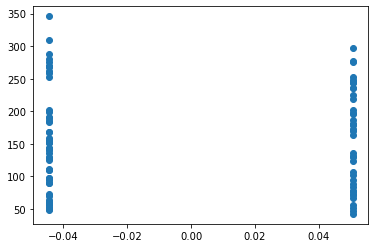

In [24]:
plt.scatter(X_test[:,1], Y_test) 
plt.plot(X_test, Y_pred)
plt.show()